<a href="https://colab.research.google.com/github/Gatiwi93/Pronosticos/blob/main/Capitulo_6/Modelo_Promedio_M%C3%B3vil_Doble.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Cargar librerias y permitir acceso de drive

In [1]:
#Librerias
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
from scipy.optimize import minimize

In [2]:
#Cargar Drive
drive.mount('/content/drive')

Mounted at /content/drive


##Recopilación de datos

##Conjunto de datos del [INEGI](https://www.inegi.org.mx/datosabiertos/)

In [3]:
# Ruta al archivo CSV en Google Drive
archivo_csv = '/content/drive/MyDrive/Recursos-Pronosticos/tr_inpp_indicador_mensual_2003_2024.csv'

In [4]:
# Cargar el archivo CSV en un DataFrame de Pandas
datos = pd.read_csv(archivo_csv)

In [5]:
datos

,COBERTURA,PERIODICIDAD,FECHA,CONCEPTO,VALOR,UNIDAD_MEDIDA,ESTATUS
0,Nacional,Mensual,\t2003-01-01,"Índice nacional de precios productor, Producci...",NaN,Índice,Cifras definitivas
1,Nacional,Mensual,\t2003-02-01,"Índice nacional de precios productor, Producci...",NaN,Índice,Cifras definitivas
2,Nacional,Mensual,\t2003-03-01,"Índice nacional de precios productor, Producci...",NaN,Índice,Cifras definitivas
3,Nacional,Mensual,\t2003-04-01,"Índice nacional de precios productor, Producci...",NaN,Índice,Cifras definitivas
4,Nacional,Mensual,\t2003-05-01,"Índice nacional de precios productor, Producci...",NaN,Índice,Cifras definitivas
...,...,...,...,...,...,...,...
1519,Nacional,Mensual,\t2023-10-01,"Índice nacional de precios productor, Producci...",126.327149,Índice,Cifras definitivas
1520,Nacional,Mensual,\t2023-11-01,"Índice nacional de precios productor, Producci...",129.096047,Índice,Cifras definitivas
1521,Nacional,Mensual,\t2023-12-01,"Índice nacional de precios productor, Producci...",128.505843,Índice,Cifras definitivas
1522,Nacional,Mensual,\t2024-01-01,"Índice nacional de precios productor, Producci...",133.251450,Índice,Cifras definitivas


##Exploración de datos

In [6]:
#Valores únicos de la columna CONCEPTO del conjunto de datos INPC Mensual
datos['CONCEPTO'].unique()

array(['Índice nacional de precios productor, Producción total según actividad económica (finales más intermedios), INPP sin Petróleo y con Servicios',
       'Índice nacional de precios productor, Mercancías y Servicios Intermedios, Bienes intermedios, según quién los produce.',
       'Índice nacional de precios productor, Mercancías y servicios finales, Por origen, Mercancías y servicios finales, excluyendo petróleo.',
       'Índice nacional de precios productor, Producción total según actividad económica (finales más intermedios), Actividades terciarias',
       'Índice nacional de precios productor, Producción total según actividad económica (finales más intermedios), Actividades secundarias sin petróleo',
       'Índice nacional de precios productor, Producción total según actividad económica (finales más intermedios), Actividades primarias'],
      dtype=object)

In [7]:
# Eliminar los valores nulos de la columna 'VALOR'
datos_sin_nulos = datos.dropna(subset=['VALOR'])

datos_sin_nulos

,COBERTURA,PERIODICIDAD,FECHA,CONCEPTO,VALOR,UNIDAD_MEDIDA,ESTATUS
11,Nacional,Mensual,\t2003-12-01,"Índice nacional de precios productor, Producci...",48.573241,Índice,Cifras definitivas
12,Nacional,Mensual,\t2004-01-01,"Índice nacional de precios productor, Producci...",48.889453,Índice,Cifras definitivas
13,Nacional,Mensual,\t2004-02-01,"Índice nacional de precios productor, Producci...",49.478647,Índice,Cifras definitivas
14,Nacional,Mensual,\t2004-03-01,"Índice nacional de precios productor, Producci...",50.016838,Índice,Cifras definitivas
15,Nacional,Mensual,\t2004-04-01,"Índice nacional de precios productor, Producci...",50.496742,Índice,Cifras definitivas
...,...,...,...,...,...,...,...
1519,Nacional,Mensual,\t2023-10-01,"Índice nacional de precios productor, Producci...",126.327149,Índice,Cifras definitivas
1520,Nacional,Mensual,\t2023-11-01,"Índice nacional de precios productor, Producci...",129.096047,Índice,Cifras definitivas
1521,Nacional,Mensual,\t2023-12-01,"Índice nacional de precios productor, Producci...",128.505843,Índice,Cifras definitivas
1522,Nacional,Mensual,\t2024-01-01,"Índice nacional de precios productor, Producci...",133.251450,Índice,Cifras definitivas


In [8]:
datos_sin_nulos['CONCEPTO'].unique()

array(['Índice nacional de precios productor, Producción total según actividad económica (finales más intermedios), INPP sin Petróleo y con Servicios',
       'Índice nacional de precios productor, Mercancías y Servicios Intermedios, Bienes intermedios, según quién los produce.',
       'Índice nacional de precios productor, Mercancías y servicios finales, Por origen, Mercancías y servicios finales, excluyendo petróleo.',
       'Índice nacional de precios productor, Producción total según actividad económica (finales más intermedios), Actividades terciarias',
       'Índice nacional de precios productor, Producción total según actividad económica (finales más intermedios), Actividades secundarias sin petróleo',
       'Índice nacional de precios productor, Producción total según actividad económica (finales más intermedios), Actividades primarias'],
      dtype=object)

##Procesamiento de datos

In [9]:
#Filtrar por el concepto de INPC Energéticos
Actividades_primarias = datos[datos['CONCEPTO'] == 'Índice nacional de precios productor, Producción total según actividad económica (finales más intermedios), Actividades primarias']
Actividades_primarias

,COBERTURA,PERIODICIDAD,FECHA,CONCEPTO,VALOR,UNIDAD_MEDIDA,ESTATUS
1270,Nacional,Mensual,\t2003-01-01,"Índice nacional de precios productor, Producci...",37.281265,Índice,Cifras definitivas
1271,Nacional,Mensual,\t2003-02-01,"Índice nacional de precios productor, Producci...",37.452104,Índice,Cifras definitivas
1272,Nacional,Mensual,\t2003-03-01,"Índice nacional de precios productor, Producci...",38.292203,Índice,Cifras definitivas
1273,Nacional,Mensual,\t2003-04-01,"Índice nacional de precios productor, Producci...",37.808671,Índice,Cifras definitivas
1274,Nacional,Mensual,\t2003-05-01,"Índice nacional de precios productor, Producci...",38.293854,Índice,Cifras definitivas
...,...,...,...,...,...,...,...
1519,Nacional,Mensual,\t2023-10-01,"Índice nacional de precios productor, Producci...",126.327149,Índice,Cifras definitivas
1520,Nacional,Mensual,\t2023-11-01,"Índice nacional de precios productor, Producci...",129.096047,Índice,Cifras definitivas
1521,Nacional,Mensual,\t2023-12-01,"Índice nacional de precios productor, Producci...",128.505843,Índice,Cifras definitivas
1522,Nacional,Mensual,\t2024-01-01,"Índice nacional de precios productor, Producci...",133.251450,Índice,Cifras definitivas


In [10]:
Actividades_primarias

,COBERTURA,PERIODICIDAD,FECHA,CONCEPTO,VALOR,UNIDAD_MEDIDA,ESTATUS
1270,Nacional,Mensual,\t2003-01-01,"Índice nacional de precios productor, Producci...",37.281265,Índice,Cifras definitivas
1271,Nacional,Mensual,\t2003-02-01,"Índice nacional de precios productor, Producci...",37.452104,Índice,Cifras definitivas
1272,Nacional,Mensual,\t2003-03-01,"Índice nacional de precios productor, Producci...",38.292203,Índice,Cifras definitivas
1273,Nacional,Mensual,\t2003-04-01,"Índice nacional de precios productor, Producci...",37.808671,Índice,Cifras definitivas
1274,Nacional,Mensual,\t2003-05-01,"Índice nacional de precios productor, Producci...",38.293854,Índice,Cifras definitivas
...,...,...,...,...,...,...,...
1519,Nacional,Mensual,\t2023-10-01,"Índice nacional de precios productor, Producci...",126.327149,Índice,Cifras definitivas
1520,Nacional,Mensual,\t2023-11-01,"Índice nacional de precios productor, Producci...",129.096047,Índice,Cifras definitivas
1521,Nacional,Mensual,\t2023-12-01,"Índice nacional de precios productor, Producci...",128.505843,Índice,Cifras definitivas
1522,Nacional,Mensual,\t2024-01-01,"Índice nacional de precios productor, Producci...",133.251450,Índice,Cifras definitivas


##Modelo de Promedio Móvil Doble

In [11]:
# Función para calcular el error cuadrático medio (MSE) del modelo de promedio móvil doble
def double_ema_mse(params):
    alpha, beta = params
    model = ExponentialSmoothing(Actividades_primarias['VALOR'], trend='add', seasonal='add', seasonal_periods=12)
    model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)
    predictions = model_fit.fittedvalues
    mse = mean_squared_error(Actividades_primarias['VALOR'], predictions)
    return mse

In [12]:
# Optimizar los parámetros alpha y beta del modelo de promedio móvil doble
initial_guess = [0.2, 0.2]
result = minimize(double_ema_mse, initial_guess, method='L-BFGS-B', bounds=[(0, 1), (0, 1)])
alpha_opt, beta_opt = result.x


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
<ipython-input-11-e98139c7d16b>:5: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
<ipython-input-11-e98139c7d16b>:5: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit = model.fit(smoothing_level=alpha, smoothing_slope=beta)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
<ipy

In [15]:
# Ajustar el modelo de promedio móvil doble con los parámetros optimizados
model_opt = ExponentialSmoothing(Actividades_primarias['VALOR'], trend='add', seasonal='add', seasonal_periods=12)
model_fit_opt = model_opt.fit(smoothing_level=alpha_opt, smoothing_slope=beta_opt)
predictions_opt = model_fit_opt.fittedvalues

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
<ipython-input-15-a3a72da4f55b>:3: FutureWarning: the 'smoothing_slope' keyword is deprecated, use 'smoothing_trend' instead.
  model_fit_opt = model_opt.fit(smoothing_level=alpha_opt, smoothing_slope=beta_opt)


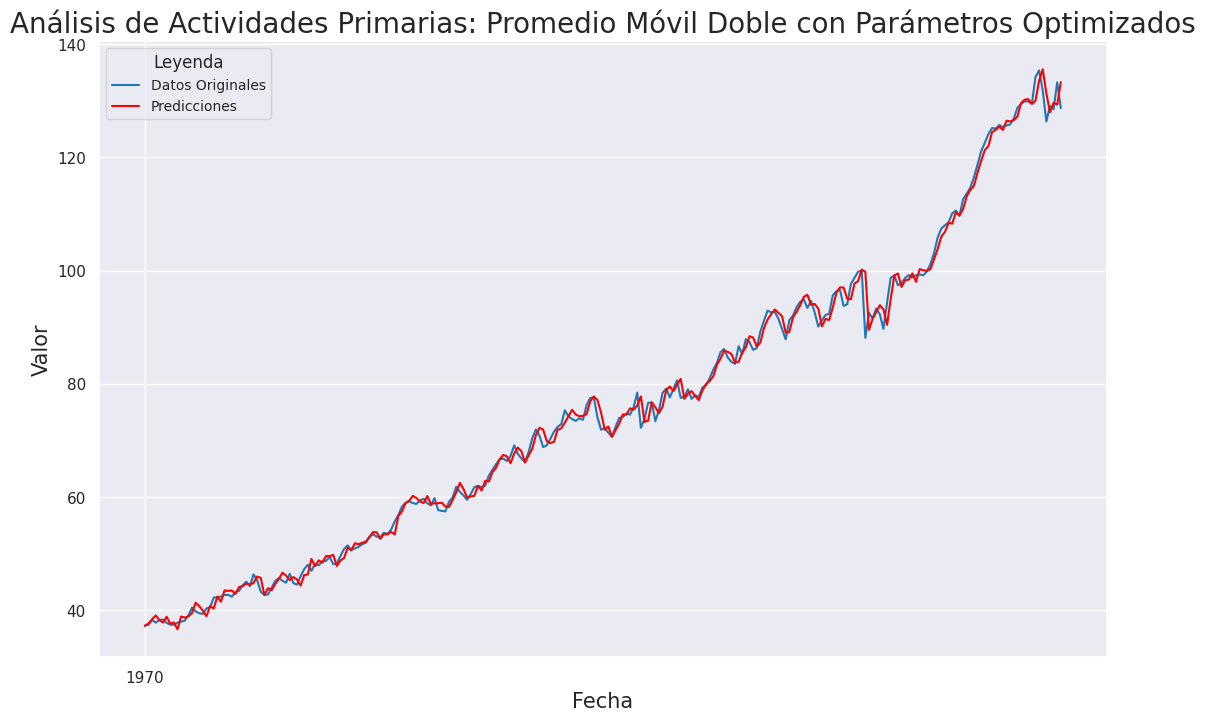

In [19]:
import seaborn as sns
import matplotlib.dates as mdates

# Establecer el estilo y el contexto de Seaborn
sns.set_style("darkgrid")
sns.set_context("notebook")

# Crear la figura con Matplotlib
fig, ax = plt.subplots(figsize=(13, 8))

# Graficar los datos originales y las predicciones con Seaborn
sns.lineplot(x=Actividades_primarias['FECHA'], y=Actividades_primarias['VALOR'], label='Datos Originales', ax=ax)
sns.lineplot(x=Actividades_primarias['FECHA'], y=predictions_opt, label='Predicciones', color='red', ax=ax)

# Personalizar el título y las etiquetas de los ejes
ax.set_title('Análisis de Actividades Primarias: Promedio Móvil Doble con Parámetros Optimizados', fontsize=20)
ax.set_xlabel('Fecha', fontsize=15)
ax.set_ylabel('Valor', fontsize=15)

# Formatear las fechas en el eje x para una mejor lectura
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Añadir una cuadrícula para facilitar la comparación de los datos
ax.grid(True)

# Añadir una leyenda mejorada
ax.legend(loc='upper left', frameon=True, fontsize=10, title='Leyenda')

# Mostrar el gráfico
plt.show()

In [20]:
print(f"Alpha optimizado: {alpha_opt}")
print(f"Beta optimizado: {beta_opt}")

Alpha optimizado: 0.908772647637935
Beta optimizado: 0.0
